<a href="https://colab.research.google.com/github/chavamoon/MachineLearningExamples/blob/main/Python/SimpleLinealRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

**Objective**: 

Using linear regression to predict the variable 'Glucose' from Indian women Glucose analysis sample dataset.

**1. DATA LOAD**

In [8]:
# Random seed for making the experiment reproducible 
np.random.seed(200728)

In [23]:
diabetes_dataset = pd.read_csv("diabetes.csv")
# columns in lowercase for an easier data manipulation
diabetes_dataset.rename(columns={column: column.lower() for column in  diabetes_dataset.columns}, inplace=True )

In [20]:
{column: column.lower() for column in  diabetes_dataset.columns}

{'Age': 'age',
 'BMI': 'bmi',
 'BloodPressure': 'bloodpressure',
 'DiabetesPedigreeFunction': 'diabetespedigreefunction',
 'Glucose': 'glucose',
 'Insulin': 'insulin',
 'Outcome': 'outcome',
 'Pregnancies': 'pregnancies',
 'SkinThickness': 'skinthickness'}

**2. DATA ANALYSIS**

In [24]:
diabetes_dataset.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
diabetes_dataset.shape

(768, 9)

In [26]:
diabetes_dataset.describe()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


checking correlation between variables


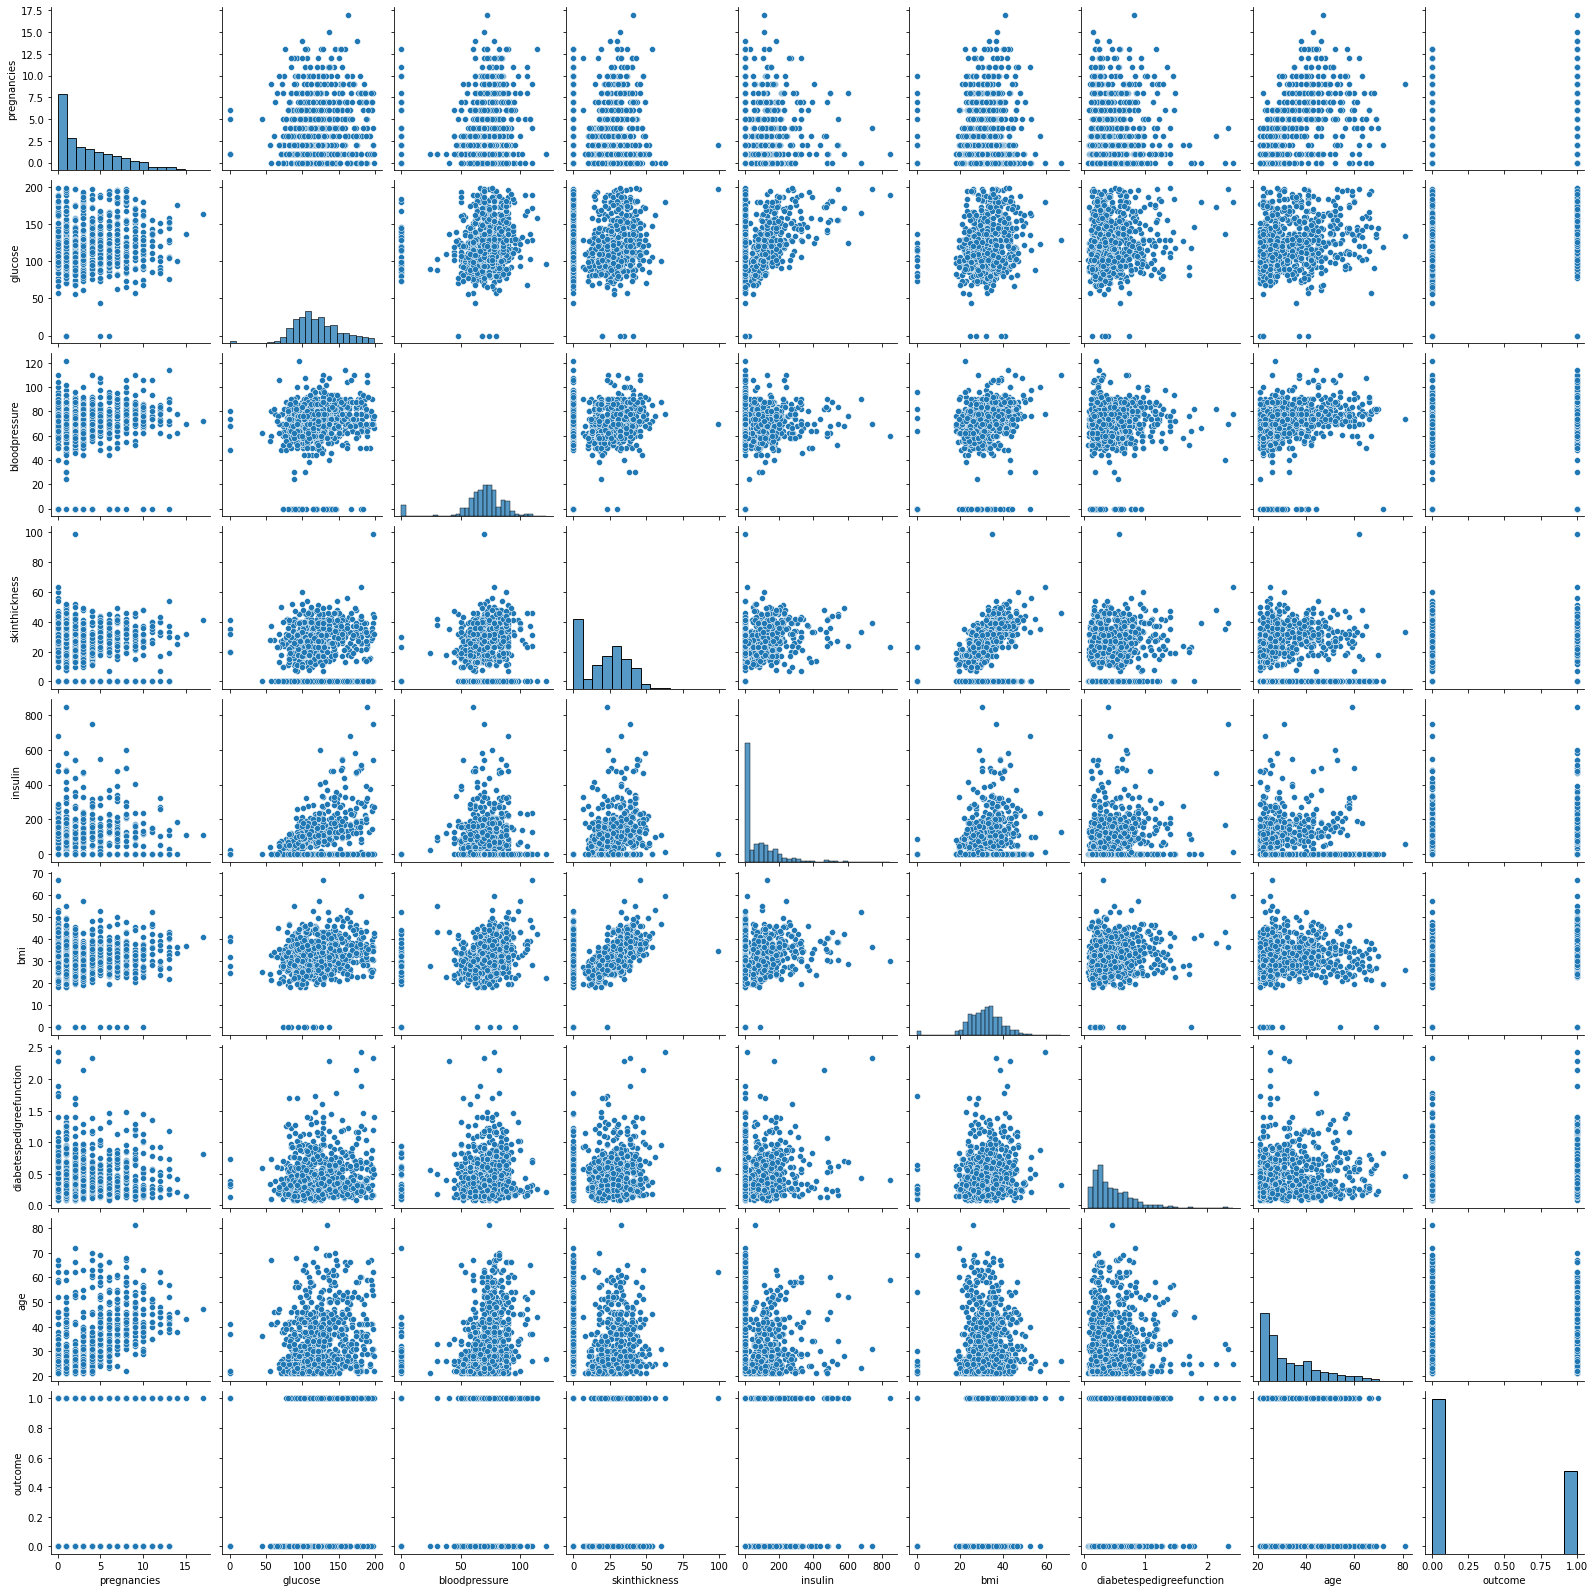

In [27]:
#checking correlation between variables
sns.pairplot(diabetes_dataset)

In [28]:
#Correlation matrix
diabetes_dataset.corr()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
bloodpressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skinthickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diabetespedigreefunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Insuline and bmi are the best candidates for predicting glucose, in this example we will use bmi to predict glucose

In [31]:
X = diabetes_dataset[["bmi"]]
y = diabetes_dataset[["glucose"]]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [38]:
print("Shape of X_train: " , X_train.shape, ". Shape of X_test" , X_test.shape)

Shape of X_train:  (537, 1) . Shape of X_test (231, 1)


In [39]:
print("Shape of y_train: " , y_train.shape, ". Shape of y_test" , y_test.shape)

Shape of y_train:  (537, 1) . Shape of y_test (231, 1)


**3. TRAINING**

In [40]:
lr = LinearRegression()

In [41]:
# Send training values to LinearRegression
m_lr = lr.fit(X_train, y_train)

Getting betas and intercept

In [43]:
# Betas
m_lr.coef_

array([[0.88262361]])

In [44]:
#Intercept
m_lr.intercept_

array([92.68416999])

Predictions

In [45]:
predictions = m_lr.predict(X_test)

In [46]:
#last_five predictions
predictions[:5]

array([[123.48773384],
       [111.30752808],
       [118.80982873],
       [127.81258951],
       [124.54688217]])

**4. PERFORMANCE METRICS**

In [47]:
#MAE
mean_absolute_error(y_test, predictions)

24.45332477793409

In [49]:
#RMSE
mean_squared_error(y_test, predictions, squared=False)

30.88959746514379

**5.RESIDUALS**

In [54]:
residuals = y_test - predictions

In [98]:
#Converting predictions array from shape (231,1) to (231,)
predictions_array = predictions.reshape(predictions.shape[0],)

In [100]:
 # predictions to 231 single array

 df_residuals = pd.DataFrame({
     'y_test':residuals['glucose'],
     'predictions': predictions_array,
     'residuals':residuals['glucose'] })


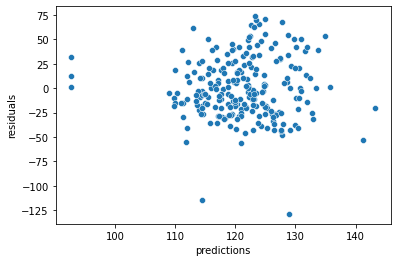

In [102]:
#Dots should be centered in zero and have constants variance (no pattern)
sns.scatterplot(x="predictions", y="residuals", data=df_residuals)

**5. QQPLOT**

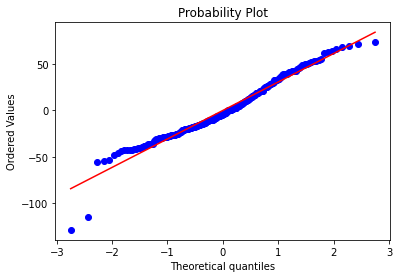

In [105]:
# Must follow 45 degrees line
stats.probplot(residuals['glucose'], dist='norm', plot=pylab)
pylab.show()